# 5 支持向量机(SVM) Part I

支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。SVM 特别适合应用于复杂但中小规模数据集的分类问题。

## 5.1 线性支持向量机分类

SVM 的基本思想能够用一些图片来解释得很好，下图展示了鸢尾花数据集的一部分。这两个种类能够被非常清晰，非常容易的用一条直线分开（即线性可分的）。左边的图显示了三种可能的线性分类器的判定边界。其中用虚线表示的线性模型判定边界很差，甚至不能正确地划分类别。另外两个线性模型在这个数据集表现的很好，但是它们的判定边界很靠近样本点，在新的数据上可能不会表现的很好。相比之下，右边图中 SVM 分类器的判定边界实线，不仅分开了两种类别，而且还尽可能地远离了最靠近的训练数据点。你可以认为 SVM 分类器在两种类别之间保持了一条尽可能宽敞的街道（图中平行的虚线），其被称为最大间隔分类。



In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))

svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

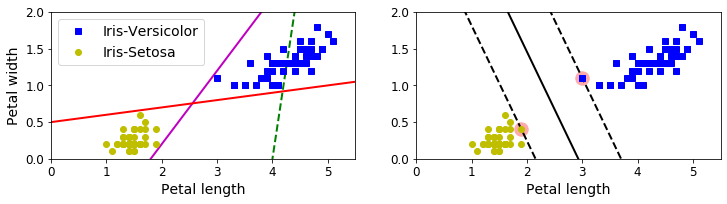

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

我们注意到添加更多的样本点在“街道”外并不会影响到判定边界，因为判定边界是由位于“街道”边缘的样本点确定的，这些样本点被称为“支持向量”（图中被圆圈圈起来的点）

> 警告
> 
> SVM 对特征缩放比较敏感，可以看到上图：左边的图中，垂直的比例要更大于水平的比例，所以最宽的“街道”接近水平。但对特征缩放后（例如使用Scikit-Learn的StandardScaler），判定边界看起来要好得多，如右图。

[-2, 2, -2, 2]

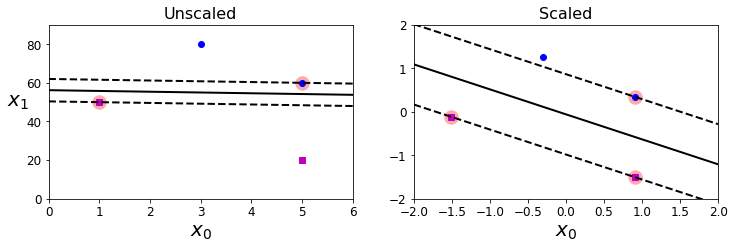

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

### 5.2 软间隔分类

如果我们严格地规定所有的数据都不在“街道”上，都在正确地两边，称为硬间隔分类，硬间隔分类有两个问题，
   - 第一，只对线性可分的数据起作用，
   - 第二，对异常点敏感。
   
下图显示了只有一个异常点的鸢尾花数据集：左边的图中很难找到硬间隔，右边的图中判定边界和我们之前在图中没有异常点的判定边界非常不一样，它很难一般化。


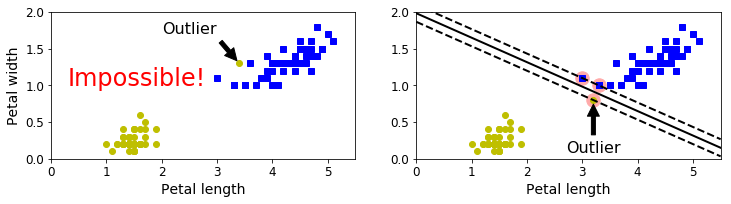

In [7]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

为了避免上述的问题，我们更倾向于使用更加软性的模型。目的在保持“街道”尽可能大和避免间隔违规（例如：数据点出现在“街道”中央或者甚至在错误的一边）之间找到一个良好的平衡。这就是软间隔分类。

在 Scikit-Learn 库的 SVM 类，你可以用`C`超参数（惩罚系数）来控制这种平衡：较小的`C`会导致更宽的“街道”，但更多的间隔违规。图 5-4 显示了在非线性可分隔的数据集上，两个软间隔SVM分类器的判定边界。左边图中，使用了较大的`C`值，导致更少的间隔违规，但是间隔较小。右边的图，使用了较小的`C`值，间隔变大了，但是许多数据点出现在了“街道”上。然而，第二个分类器似乎泛化地更好：事实上，在这个训练数据集上减少了预测错误，因为实际上大部分的间隔违规点出现在了判定边界正确的一侧。

> 提示
> 
> 如果你的 SVM 模型过拟合，你可以尝试通过减小超参数`C`去调整。 

以下的 Scikit-Learn 代码加载了内置的鸢尾花（Iris）数据集，缩放特征，并训练一个线性 SVM 模型（使用`LinearSVC`类，超参数`C=1`，hinge 损失函数）来检测 Virginica 鸢尾花，生成的模型在下图的右图。

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

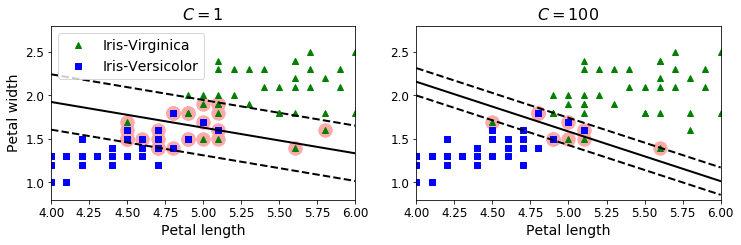

In [9]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

> 注
> 
> 不同于 Logistic 回归分类器，SVM 分类器不会输出每个类别的概率。

作为一种选择，你可以在 SVC 类，使用`SVC(kernel="linear", C=1)`，但是它比较慢，尤其在较大的训练集上，所以一般不被推荐。另一个选择是使用`SGDClassifier`类，即`SGDClassifier(loss="hinge", alpha=1/(m*C))`。它应用了随机梯度下降（SGD 见第四章）来训练一个线性 SVM 分类器。尽管它不会和`LinearSVC`一样快速收敛，但是对于处理那些不适合放在内存的大数据集是非常有用的，或者处理在线分类任务同样有用。

> 提示
> 
> `LinearSVC`要使偏置项规范化，首先你应该集中训练集减去它的平均数。如果你使用了`StandardScaler`，那么它会自动处理。此外，确保你设置`loss`参数为`hinge `，因为它不是默认值。最后，为了得到更好的效果，你需要将`dual`参数设置为`False`，除非特征数比样本量多（我们将在本章后面讨论二元性）


# 补充内容

## 1. sklearn 中的 Pipeline 机制

管道机制实现了对全部步骤的流式化封装和管理（streaming workflows with pipelines）

Pipeline 的中间过程由sklearn相适配的转换器（transformer）构成，最后一步是一个estimator（模型）。中间的节点都可以执行fit和transform方法，这样预处理都可以封装进去；最后节点只需要实现fit方法，通常就是我们的模型。流程如下图所示。

![](./images/pipline.webp)

Pipeline可以将许多算法模型串联起来，比如将特征提取、归一化、分类组织在一起形成一个典型的机器学习问题工作流。主要带来两点好处：

 - 直接调用fit和predict方法来对pipeline中的所有算法模型进行训练和预测。
 - 可以结合grid search对参数进行选择。

 ```python
 >> from sklearn.pipeline import Pipeline
 >> from sklearn.preprocessing import StandardScaler

 >> poly_reg = Pipeline([
 >>     ("poly", PolynomialFeatures(degree=2)),
 >>   ("std_scaler", StandardScaler()),
 >>   ("lin_reg", LinearRegression())
 >> ])

 >> poly_reg.fit(X, y)
 >> y_predict = poly_reg.predict(X)
 ```
 
Pipline

 Parameters
  - steps : 步骤：列表(list) 
    - 被连接的（名称，变换）元组（实现拟合/变换）的列表，按照它们被连接的顺序，最后一个对象是估计器(estimator)。
  - memory:内存参数,Instance of sklearn.external.joblib.Memory or string, optional (default=None)
  - 属性,name_steps:bunch object，具有属性访问权限的字典 
  - 只读属性以用户给定的名称访问任何步骤参数。键是步骤名称，值是步骤参数。或者也可以直接通过”.步骤名称”获取

 Funcution
  Pipline的方法都是执行各个学习器中对应的方法,如果该学习器没有该方法,会报错, 假设该Pipline共有n个学习器
   - transform,依次执行各个学习器的transform方法
   - inverse_transform,依次执行各个学习器的inverse_transform方法
   - fit,依次对前n-1个学习器执行fit和transform方法,第n个学习器(最后一个学习器)执行fit方法
   - predict,执行第n个学习器的predict方法
   - score,执行第n个学习器的score方法
   - set_params,设置第n个学习器的参数
   - get_param,获取第n个学习器的参数

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# 获取iris数据集
iris = load_iris()
X_data = iris.data
y_data = iris.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 1)

# 构建pipeline
pipe_lr = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))
                    ])


In [32]:
pipe_lr.fit(X_train, y_train)
print('Test accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test accuracy: 0.842


## 2. sklearn 参数优化方法

学习器模型中一般有两个参数：
  - 一类参数可以从数据中学习估计得到，
  - 还有一类参数无法从数据中估计，只能靠人的经验进行指定，后一类参数就叫超参数

比如，支持向量机里的C，Kernel，gama，朴素贝叶斯里的alpha等，在学习其模型的设计中，我们要搜索超参数空间为学习器模型找到最合理的超参数，可以通过以下方法获得学习器模型的参数列表和当前取值：estimator.get_params()

![](./images/searchcv.png)

sklearn 提供了两种通用的参数优化方法：网络搜索和随机采样，

  - 网格搜索交叉验证（GridSearchCV）：以穷举的方式遍历所有可能的参数组合
  - 随机采样交叉验证（RandomizedSearchCV）：依据某种分布对参数空间采样，随机的得到一些候选参数组合方案

sklearn.model_selection: GridSearchCV, RandomizedSearchCV, ParameterGrid, ParameterSampler, fit_grid_point



### 2.1 GridSearchCV

该方法提供了在参数网格上穷举候选参数组合的方法。参数网格由参数param_grid来指定，比如，下面展示了设置网格参数param_grid的一个例子：



In [37]:
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

```
上面的参数指定了要搜索的两个网格（每个网格就是一个字典）：第一个里面有4个参数组合节点，第二个里面有4*2=8个参数组合节点

GridSearchCV的实例实现了通用的estimator API：当在数据集上训练的时候，所有可能的参数组合将会被评估，训练完成后选组最优的参数组合对应的estimator。

In [40]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

iris=datasets.load_iris()

parameters={'kernel':('rbf','linear'),'C':[1,5,10]}

svr=svm.SVC()

clf=GridSearchCV(svr,parameters)

clf.fit(iris.data,iris.target)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### 2. 3. GridSearch和pipeline联合使用

  GridSearchCV 
  - 第一个参数estimator为进行训练的模型，
  - parameters是模型的参数词典。parameters中的key为模型参数名称，value为模型参数的值的元组（包含多个可选择的值）。

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

my_svc = SVC()
parameters = {'kernel':('linear','rbf'), 'C':[1, 2], 'gamma':[0.125, 0.5]}
 

# 构建pipeline
pipe_svc = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', GridSearchCV(my_svc, parameters, n_jobs=-1))
                    ])


In [43]:
pipe_svc.fit(X_train, y_train)

print('Test accuracy: %.3f' % pipe_svc.score(X_test, y_test))

Test accuracy: 0.974


### 2.4 RandomizedSearchCV

RandomizedSearchCV类实现了在参数空间上进行随机搜索的机制，其中参数的取值是从某种概率分布中抽取的，这个概率分布描述了对应的参数的所有取值情况的可能性，这种随机采样机制与网格穷举搜索相比，有两大优点：

  - 相比于整体参数空间，可以选择相对较少的参数组合数量
  -  添加参数节点不影响性能，不会降低效率
  - 指定参数的采样范围和分布可以用一个字典开完成，跟网格搜索很像，另外，计算预算（总共要采样多少参数组合或者迭代做多少次）可以用参数n_iter来指定，针对每一个参数，既可以使用可能取值范围内的概率分布，也可以指定一个离散的取值列表（离散的列表将被均匀采样）

```python
  {'C':scipy.stats.expon(scale=100),
   'gamma':scipy.stats.expon(scale=.1),
    'kernel':['rbf'],
    'class_weight':['balanced':None]}
```
    
上边的例子中：
   - C服从指数分布，
   - gamma服从指数分布，   
  这个例子使用了scipy.stats模块，其中包含了很多有用的分布用来产生参数采样点，像expon，gamma，uniform or randint，原则上，任何函数都可以传递进去，只要他提供一个rvs（random variate sample）方法来返回采样值，rvs函数的连续调用应该能够保证产生独立同分布的样本值

In [44]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

parameters_rnd = {'kernel':('linear','rbf'), 'C':scipy.stats.expon(scale=100), 'gamma':scipy.stats.expon(scale=.1),}

# 构建pipeline
pipe_svc_rnd = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', RandomizedSearchCV(my_svc, parameters_rnd, n_iter=20, verbose=2))
                    ])


In [45]:
pipe_svc_rnd.fit(X_train, y_train)

print('Test accuracy: %.3f' % pipe_svc.score(X_test, y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=111.21338447386744, gamma=0.044417493061031744, kernel=linear .
[CV]  C=111.21338447386744, gamma=0.044417493061031744, kernel=linear, total=   0.0s
[CV] C=111.21338447386744, gamma=0.044417493061031744, kernel=linear .
[CV]  C=111.21338447386744, gamma=0.044417493061031744, kernel=linear, total=   0.0s
[CV] C=111.21338447386744, gamma=0.044417493061031744, kernel=linear .
[CV]  C=111.21338447386744, gamma=0.044417493061031744, kernel=linear, total=   0.0s
[CV] C=73.04953249815037, gamma=0.20986086379007945, kernel=linear ...
[CV]  C=73.04953249815037, gamma=0.20986086379007945, kernel=linear, total=   0.0s
[CV] C=73.04953249815037, gamma=0.20986086379007945, kernel=linear ...
[CV]  C=73.04953249815037, gamma=0.20986086379007945, kernel=linear, total=   0.0s
[CV] C=73.04953249815037, gamma=0.20986086379007945, kernel=linear ...
[CV]  C=73.04953249815037, gamma=0.20986086379007945, kernel=linear, total=   0.0s
[CV] C=18

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
